# Synergy Logistics

Synergy Logistics es una empresa intermediaria de servicios de importación y exportación de una gran variedad de productos. La empresa cuenta con una base de datos que refleja las rutas más importantes desde el 2015 con el respectivo origen, destino, año, producto, modo de transporte y valor total. 
El propósito de este trabajo es analizar la viabilidad de tres opciones de enfoque: rutas de importación y exportación, medios de transporte utilizados y valor total de importaciones y exportaciones.

Opcion 1) *Rutas de importación y exportación*. La empresa está considerando la posibilidad de enfocar sus esfuerzos en las diez rutas más demandadas. Acorde a los flujos de importación y exportación, ¿cuáles son esas diez rutas?, ¿le conviene implementar esta estrategia? y ¿por qué?

In [1]:
# En esta parte del código encontraremos las rutas más demandadas según sus flujos.
# Importamos la paquetería pandas, creamos un dataframe que convertiremos en lista 
# para facilitar su manipulación.
import pandas as pd
df = pd.read_csv("synergy_logistics_database.csv", index_col = 0)
rutas = df[['origin','destination']]
lista = rutas.values.tolist()
# Creamos una lista vacía que se llenará en los siguientes ciclos for.
demanda = []
# Iteramos sobre lista
for i in lista:
    #Agregamos las rutas que sin repetirse
    if i not in demanda:
        demanda.append(i)
# Creamos una lista vacía que se llenará en los siguientes ciclos for.
demandita = []
# Iteramos en demandita para agregar una lista con elementos i y
# un cero que nos servirá como contador
for i in demanda:
    demandita.append([i,0])
# Iteramos en demandita y por cada elemento de demandita iteramos en lista
for i in demandita:
    for j in lista:
        # Si coinciden en origen agregamos 1 a nuestro contador
        if i[0] == j:
            i[1] += 1
# Ordenamos demandita por el número de veces que hay un movimiento
# por cada ruta
demandaordenada = sorted(demandita, key=lambda i: i[1], reverse = True)
# Seleccionamos los primeros 10 elementos de demandaordenada
top10demanda = demandaordenada[:10]
print(top10demanda)
# Hacemos una lista con todas las columnas de nuestro archivo csv
listota = df.values.tolist()
# Contador para determinar la cantidad de dinero total en movimiento
dinero = 0
# Iteramos sobre listota
for i in listota:
    # Vamos sumando la cantidad de dinero por cada movimiento
    dinero += i[8]
print(dinero)
# Creamos una lista vacía que se llenará en los siguientes ciclos for.
listaestrategia = []
# Iteramos sobre listota y vamos agregando el segundo, tercero y noveno elemento
for i in listota:
    listaestrategia.append([[i[1],i[2]],i[8]])
# Contador para determinar el dinero en movimiento del top 10
dinerotop10 = 0
print(listaestrategia[:5])
# Iteramos sobre top10demanda
for i in top10demanda:
    # Por cada elemento de top10demanda iteramos en nuestra listaestrategia
    for j in listaestrategia:
        # Si coinciden los países agregamos el dinero
        if i[0] == j[0]:
            dinerotop10 += j[1]
# Imprimimos el porcentaje del dinero del top 10
porcentajetop10 = round(dinerotop10 / dinero * 100,1)
print(str(porcentajetop10) + " %")   

[[['South Korea', 'Vietnam'], 497], [['Netherlands', 'Belgium'], 437], [['USA', 'Netherlands'], 436], [['Japan', 'Mexico'], 385], [['China', 'Mexico'], 351], [['China', 'Japan'], 343], [['Germany', 'China'], 328], [['Japan', 'Brazil'], 306], [['Germany', 'France'], 299], [['South Korea', 'Japan'], 294]]
215691298000
[[['Japan', 'China'], 33000000], [['Japan', 'China'], 16000000], [['Japan', 'China'], 29000000], [['Japan', 'China'], 14000000], [['Japan', 'China'], 17000000]]
23.1 %
[[['South Korea', 'Vietnam'], 497], [['Netherlands', 'Belgium'], 437], [['USA', 'Netherlands'], 436], [['Japan', 'Mexico'], 385], [['China', 'Mexico'], 351], [['China', 'Japan'], 343], [['Germany', 'China'], 328], [['Japan', 'Brazil'], 306], [['Germany', 'France'], 299], [['South Korea', 'Japan'], 294]]
215691298000
[[['Japan', 'China'], 33000000], [['Japan', 'China'], 16000000], [['Japan', 'China'], 29000000], [['Japan', 'China'], 14000000], [['Japan', 'China'], 17000000]]
23.1 %


Las 10 rutas más demandadas según el flujo de importaciones y exportaciones son:
- Origen Corea del Sur con destino a Vietnam.
- Origen Países Bajos con destino a Bélgica.
- Origen Estados Unidos con destino a Países Bajos.
- Origen Japón con destino a México.
- Origen China con destino a México.
- Origen China con destino a Japón.
- Origen Alemania con destino a China.
- Origen Japón con destino a Brasil.
- Origen Alemania con destino a Francia.
- Origen Corea del Sur con destino a Japón.

In [34]:
# Hacemos una lista para determinar el top 10 de las rutas con mayor
# movimiento económico
top10dinero = []
# Iteramos sobre top10demanda para agregar una lista con elementos
# el país y un cero que nos servirá como contador
for i in top10demanda:
    top10dinero.append([i[0],0])
# Iteramos sobre top10dinero
for i in top10dinero:
    # Por cada elemento de top10dinero iteramos sobre nuestra lista estrategia
    for j in listaestrategia:
        # Si coinciden los países agregamos el dinero
        if i[0] == j[0]:
            i[1] += j[1]
# Ordenamos top10dinero de acuerdo a el movimiento económico de dicha ruta
top10dinero = sorted(top10dinero, key=lambda i: i[1],reverse=True)
print(top10dinero)

[[['China', 'Mexico'], 12494000000], [['South Korea', 'Vietnam'], 6877007000], [['China', 'Japan'], 5891000000], [['Japan', 'Mexico'], 5829000000], [['South Korea', 'Japan'], 4741000000], [['Germany', 'China'], 3495875000], [['Japan', 'Brazil'], 3368155000], [['Netherlands', 'Belgium'], 3238142000], [['Germany', 'France'], 2902214000], [['USA', 'Netherlands'], 1032187000]]


Sin embargo, las 10 rutas que más aportan económicamente no coinciden necesariamente con las 10 más demandadas según con el flujo de importaciones y exportaciones. Se observa en las siguientes gráficas que el 23% de los ingresos se concentran en estas 10 rutas. Por lo tanto es una mejor estrategia concentrar esfuerzos en las 10 rutas que mayores ingresos aporten, en lugar de las 10 más demandadas. 

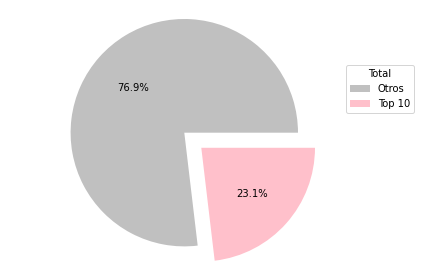

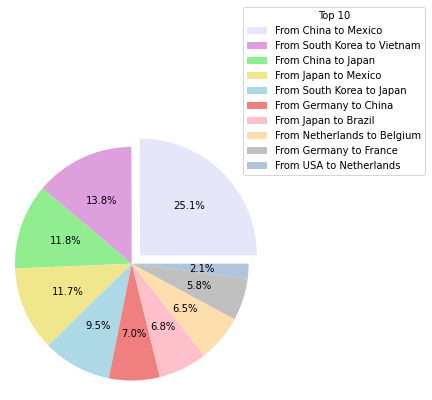

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# Hacemos una lista con valor el dinero total menos el del top 10 y
# como siguiente elemento el dinero del top 10
x = [dinero-dinerotop10, dinerotop10]
# Hacemos una lista que nos servirá para etiquetar nuestra gráfica
etiquet = ['Otros','Top 10']
# Fijamos los colores
color = ['silver', 'pink']
# Separación de una porción del pastel principal
quita = (0,0.2)
# Propiedades de la gráfica
_ = plt.pie(x, explode = quita, autopct='%1.1f%%', colors = color)
_ = plt.legend(etiquet, title = 'Total', bbox_to_anchor=(0.9, 0.8))
_ = plt.axis('equal')
_ = plt.tight_layout()
plt.show()
y = []
etiquetas = []
# Gráfica de porcentaje de aportación económica de cada ruta 
for i in top10dinero:
    y.append(i[1])
    etiquetas.append('From ' + str(i[0][0]) + ' to ' + str(i[0][1]))
y = np.array(y)
# Propiedades de la gráfica
explode = (0.1,0,0,0,0,0,0,0,0,0)
colores = ['lavender','plum','lightgreen','khaki','lightblue','lightcoral','pink','navajowhite','silver','lightsteelblue']
_ = plt.pie(y, explode = explode, autopct='%1.1f%%',colors = colores)
_ = plt.legend(etiquetas, title = "Top 10",bbox_to_anchor=(0.9, 0.8))
_ = plt.axis('equal')
_ = plt.tight_layout()
plt.show()

Opción 2) *Medio de transporte utilizado*. ¿cuáles son los tres medios de transporte más importantes para Synergy Logistics considerando el valor de las importaciones y exportaciones?, ¿cuál es el medio de transporte que podrían reducir? 

Como se observa en las siguientes gráficas, los tres medios de transporte más usados y que mayor aportan económicamente son: mar, tierra y aire. El más utilizado y con mayor aporte económico son los medios de transporte marinos y, los que menos aportan son los medios de transporte férreos. Si se quisiera reducir alguno de los medios de transporte para optimizar los recursos, en este caso tendrían que reducir costos en medios de transportée férreos.

<Figure size 1152x432 with 0 Axes>

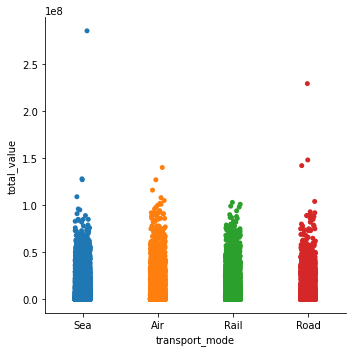

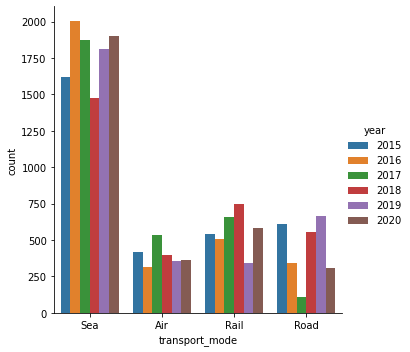

In [8]:
import seaborn as sns
# Leemos nuestro archivo csv
df = pd.read_csv('synergy_logistics_database.csv', index_col="register_id")
# Configuramos el tamaño de nuestra figura
plt.figure(figsize=(16,6))
# Fijamos x, y y el dataframe
sns.catplot(x='transport_mode', y='total_value' , data=df)
# Fijamos x, nuestro dataframe  y el tipo de gráfica 
sns.catplot(x='transport_mode', data=df, hue='year',kind='count')

Opción 3). *Valor total de importaciones y exportaciones*. Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones, ¿en qué grupo de países debería enfocar sus esfuerzos?

In [27]:
# Establecemos el dataframe "rutadinero"
rutadinero = df[['origin','destination','total_value']]
# Convertimos a lista
listarutadinero = rutadinero.values.tolist()
print(listarutadinero[:5])
# Creamos una lista vacía que se llenará en el siguiente ciclo for
# con la lista de países únicos
paises = []
for i in listarutadinero:
    if i[0] not in paises:
           paises.append(i[0])
# Creamos una lista vacía que se llenará en el siguiente ciclo for
# con los países y su aportación económica
paises_dinero = []
print(paises)
for i in paises:
    paises_dinero.append([i,0])
for i in paises_dinero:
    for j in listarutadinero:
        if i[0] == j[0]:
            i[1] += j[2]
# Ordenamos los países de acuerdo a su aportación económica de manera
# descendente, iniciando con el que más aporta.
paises_dinero = sorted(paises_dinero, key = lambda i:i[1], reverse = True)
# Obtendremos los países que aportan el 80% de los ingresos
# Lista vacía en donde alojaremos estos datos de países
top80porciento = []
contador = 0
for i in paises_dinero:
    if i[1] + contador < dinero * 0.8:
        contador += i[1]
        top80porciento.append([i[0], i[1], round(i[1] / dinero * 100,1)])
print(top80porciento)

[['Japan', 'China', 33000000], ['Japan', 'China', 16000000], ['Japan', 'China', 29000000], ['Japan', 'China', 14000000], ['Japan', 'China', 17000000]]
['Japan', 'Germany', 'China', 'Italy', 'USA', 'Russia', 'South Korea', 'Netherlands', 'France', 'Canada', 'Belgium', 'Spain', 'India', 'United Kingdom', 'Australia', 'Brazil', 'Switzerland', 'Mexico', 'Austria', 'Singapore', 'Vietnam', 'Malaysia', 'United Arab Emirates']
[['China', 45210046000, 21.0], ['USA', 23646306000, 11.0], ['Japan', 20042976000, 9.3], ['France', 19930332000, 9.2], ['South Korea', 18510146000, 8.6], ['Germany', 15593233000, 7.2], ['Russia', 14074000000, 6.5], ['Canada', 11253000000, 5.2], ['Netherlands', 4120369000, 1.9], ['Austria', 1155000, 0.0]]


El 80% de los ingresos lo aportan 10 países:
- China (26.3%)
- Estados Unidos (13.7%)
- Japón (11.6)
- Francia (11.6)
- Corea del Sur (10.7%)
- Alemania (9%)
- Rusia (8.2%)
- Canadá (6.5%)
- Países Bajos (2.4%) 
- Austria (>0%)
Si se optara por esta estrategia, éstos serían los países en donde deberían concentrarse los esfuerzos.

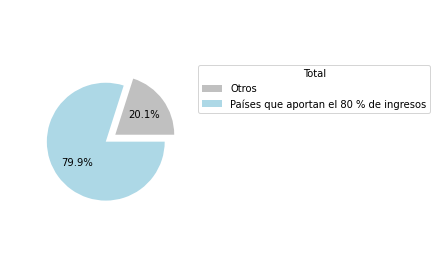

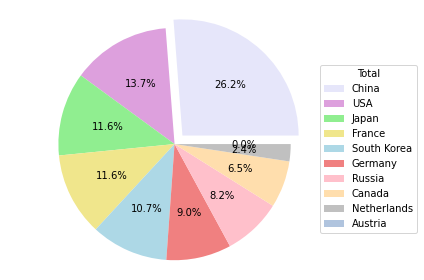

In [33]:
# Importamos paqueterías necesarias
import matplotlib.pyplot as plt
import numpy as np
# Iniciamos un contador en cero, donde se irán sumando los aortes 
# económicos cada vez que el mismo país aparezca
dinerotop80 = 0
for i in top80porciento:
    dinerotop80 += i[1]
x = [dinero-dinerotop80, dinerotop80]
# Propiedades de la gráfica
etiquet = ['Otros','Países que aportan el 80 % de ingresos']
color = ['silver', 'lightblue']
quita = (0,0.2)
plt.pie(x, explode = quita, autopct='%1.1f%%', colors = color)
plt.legend(etiquet, title = 'Total', bbox_to_anchor=(0.9, 0.8))
plt.axis('equal')
plt.tight_layout()
plt.show()
# Generamos dos listas vacías, la primera será una lista con el
# de cada país del top80% y la segunda lista nos servirá para relacionar
# cada país con sus respectivos ingresos.
y = []na
etiqueta = []
# Propiedades de la gráfica
colores = ['lavender','plum','lightgreen','khaki','lightblue','lightcoral','pink','navajowhite','silver','lightsteelblue']
for i in top80porciento:
    y.append(i[1])
    etiqueta.append(i[0])
y = np.array(y)
_ = plt.pie(y, explode = explode, autopct = '%1.1f%%', colors=colores)
_ = plt.legend(etiqueta, title = 'Total', bbox_to_anchor=(0.9,0.8))
_ = plt.axis('equal')
_ = plt.tight_layout()
plt.show()

## Conclusión
De acuerdo a lo anteriormente analizado, la mejor estrategia sería una combinación entre enfocarse en los 10 países que aportan el 80% de los ingresos y reducir el transporte férreo. En la opción 1 sólo se concentra el 23.1% de los ingresos en las 10 rutás más demandadas en cuestión económica. 
Creo que la combinación entre las opciones 2 y 3 sería la más óptima para enfocar los recursos disminuidos en el transporte férreo hacia los países que más porcentaje de ingresos generan.